## 1. Objective of Notebook

####### In this notebook, we create a Multilayer Perceptron (MLP) model of the MNIST dataset.
####### Multilayer Perceptrons (MLPs) usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting the data.

## 2. Importing importing libraries

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


#from subprocess import check_output
#print(check_output([r"C:\Users\garga\3D Objects\ELL784 Assn\"]).decode("utf-8"))


# Any results you write to the current directory are saved as output.

## 3. MNIST DATASET

In [16]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


## 4. Data Visualization

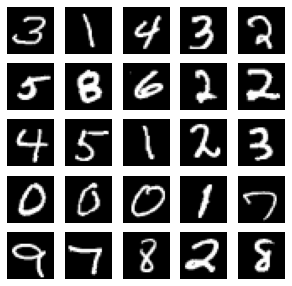

In [17]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')


## 5. Designing model architecture using keras

### 5.1 Import keras layers

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

### 5.2 Compute the number of labels

In [19]:
# compute the number of labels
num_labels = len(np.unique(y_train))

### 5.3 One-hot encoding

At this point, the labels are in digits format, 0 to 9.
This sparse scalar representation of labels is not suitable for the neural network prediction layer that outputs probabilities per class.
A more suitable format is called a one-hot vector, a 10-dim vector with all elements 0, except for the index of the digit class.
For example, if the label is 2, the equivalent one-hot vector is [0,0,1,0,0,0,0,0,0,0]. The first label has index 0.
The following lines convert each label into a one-hot vector:

In [20]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

### 5.4 Data Preprocessing

In [22]:
image_size = x_train.shape[1]
input_size = image_size * image_size

In [23]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

### 5.5 Setting network parameters

In [24]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

### 5.6 Designing the model architecture

Proposed model is 3 layer perceptron model. In keras, an MLP layer reffered to as dense. Both first and second layer is identical with 256 units each, followed by relu activation and dropout.
The main data structure in keras is sequential class that allows creation of basic neural network.

In [26]:
from keras.models import Sequential
model=Sequential()

In [27]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
model.add(Activation('softmax'))

relu or Rectified Linear Unit (ReLU) is a simple non-linear function. It allows positive inputs to pass through unchanged while clamping everything else to zero.

### 5.7 view model summary

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

## 6. Implement MLP model using keras

### 6.1 Compile the model

In [31]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

Loss function (categorical_crossentropy)
How far the predicted tensor is from the one-hot ground truth vector is called loss.

In this example, we use categorical_crossentropy as the loss function. It is the negative of the sum of the product of the target and the logarithm of the prediction.

There are other loss functions in Keras, such as mean_absolute_error and binary_crossentropy. The choice of the loss function is not arbitrary but should be a criterion that the model is learning.

For classification by category, categorical_crossentropy or mean_squared_error is a good choice after the softmax activation layer. The binary_crossentropy loss function is normally used after the sigmoid activation layer while mean_squared_error is an option for tanh output.

Optimization (optimizer adam)
With optimization, the objective is to minimize the loss function. The idea is that if the loss is reduced to an acceptable level, the model has indirectly learned the function mapping input to output.

In Keras, there are several choices for optimizers. The most commonly used optimizers are; Stochastic Gradient Descent (SGD), Adaptive Moments (Adam) and Root Mean Squared Propagation (RMSprop).

Each optimizer features tunable parameters like learning rate, momentum, and decay.

Adam and RMSprop are variations of SGD with adaptive learning rates. In the proposed classifier network, Adam is used since it has the highest test accuracy.

Metrics (accuracy)
Performance metrics are used to determine if a model has learned the underlying data distribution. The default metric in Keras is loss.

During training, validation, and testing, other metrics such as accuracy can also be included.

Accuracy is the percent, or fraction, of correct predictions based on ground truth.

### 6.2 Train the model

In [32]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4236 - accuracy: 0.8695
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1978 - accuracy: 0.9415
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1490 - accuracy: 0.9555
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1299 - accuracy: 0.9606
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1159 - accuracy: 0.9650
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.1040 - accuracy: 0.9677
Epoch 7/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0977 - accuracy: 0.9700
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.9723
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0849 - accuracy: 0.9735
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0787 - accuracy: 0.9754

### 6.3 Evaluating model performance

In [33]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9830

Test accuracy: 98.3%


## 7. overfitting and regularization

A commonly used regularizing layer is referred to as a Dropout layer.

Given a dropout rate (dropout=0.45), the Dropout layer randomly removes the fraction of units from participating in the next layer. For example, if the first layer has 256 units, after dropout=0.45 is applied, only (1 - 0.45) * 256 units = 140 units from layer 1 participate in layer 2.

The Dropout layer makes neural networks robust to unforeseen input data because the network is trained to predict correctly, even if some units are missing.

The dropout is not used in the output layer and it is only active during training. Moreover, dropout is not present during prediction.

## 8. Model without regularizer

In [34]:
model1 = Sequential()
model1.add(Dense(hidden_units, input_dim=input_size))
model1.add(Activation('relu'))
model1.add(Dense(hidden_units))
model1.add(Activation('relu'))
model1.add(Dense(num_labels))
model1.add(Activation('softmax'))

In [35]:
model1.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
model1.fit(x_train, y_train, epochs=20, batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2592 - accuracy: 0.9249
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0958 - accuracy: 0.9713
Epoch 3/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0646 - accuracy: 0.9800
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0468 - accuracy: 0.9853
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0329 - accuracy: 0.9897
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0264 - accuracy: 0.9912
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0210 - accuracy: 0.9932
Epoch 8/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0176 - accuracy: 0.9945
Epoch 9/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0160 - accuracy: 0.9946
Epoch 10/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0162 - accuracy: 0.9943

In [36]:
loss, acc = model1.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.1008 - accuracy: 0.9819

Test accuracy: 98.2%
